# Домашняя работа №4

Для датасета kaggle, [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 14,12

%matplotlib inline

**1. Загрузить датасет**

In [3]:
data=pd.read_csv("/Users/aleksandr/Downloads/creditcard.csv")

In [238]:
display(data.head())
display(data.describe())
display(data.shape)
display(data.info())
display(data.columns)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


(284807, 31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

None

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**2. Посмотреть отсутствующие значения (какое количество NaN элементов).**

In [13]:
print('Колличество пустых ячеек: {}'.format(data.isnull().sum().sum()))
print('Колличество NaN ячеек: {}'.format(np.isnan(data).sum().sum()))

Колличество пустых ячеек: 0
Колличество NaN ячеек: 0


В данном dataset нет выбросов

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

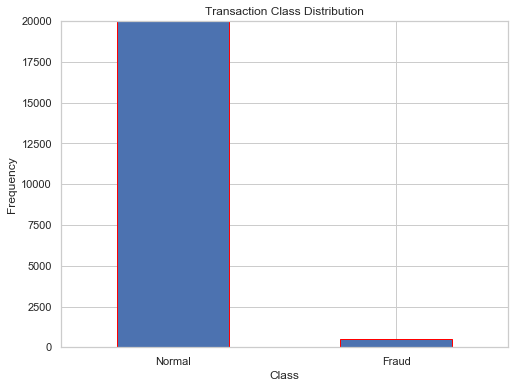

In [126]:
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0, edgecolor='red')
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.ylim((0, 20000))
plt.show()

In [240]:
vc = data['Class'].value_counts().to_frame().reset_index()
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(data), 2))
vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})
vc

,Target,Count,percent
0,0,284315,99.83
1,1,492,0.17


In [135]:
print("Колличество нормальных операций: {}".format((data['Class']==0).sum()))
print("Колличество операций с обманом: {}".format((data['Class']==1).sum()))

print('\nНормальных операций в процентном соотношении', round(data['Class'].value_counts()[0]/len(data) * 100,2), '%')
print('Обманных операций в процентном соотношении', round(data['Class'].value_counts()[1]/len(data) * 100,2), '%')

Колличество нормальных операций: 284315
Колличество операций с обманом: 492

Нормальных операций в процентном соотношении 99.83 %
Обманных операций в процентном соотношении 0.17 %


Очевидно, что данные абсолютно несбалансированы!

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [116]:
Normal = data[data['Class']==0]
Fraud = data[data['Class']==1]

print(Normal.shape)
print(Fraud.shape)

(284315, 31)
(492, 31)


In [109]:
# Normal.Amount.describe()
# Fraud.Amount.describe()

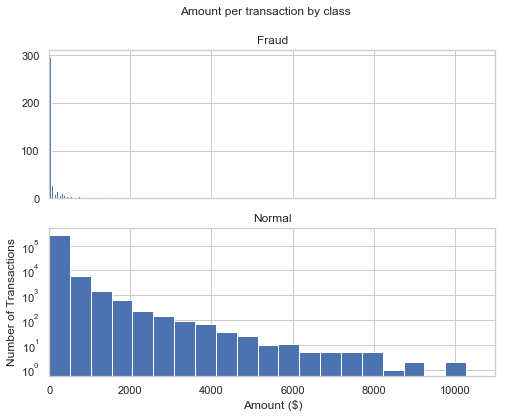

In [133]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 11000))
plt.yscale('log')
plt.show()

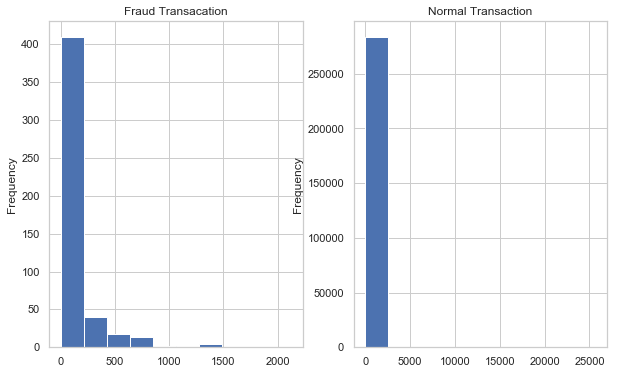

In [141]:
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transaction")
plt.show()

In [242]:
print('Сумма нормальных операций {} $'.format(Normal['Amount'].sum()))
print('Сумма обманных операций {} $'.format(Fraud['Amount'].sum()))

Сумма нормальных операций 25102462.04 $
Сумма обманных операций 60127.97 $


**5. Построить графики histograms для всех значений**

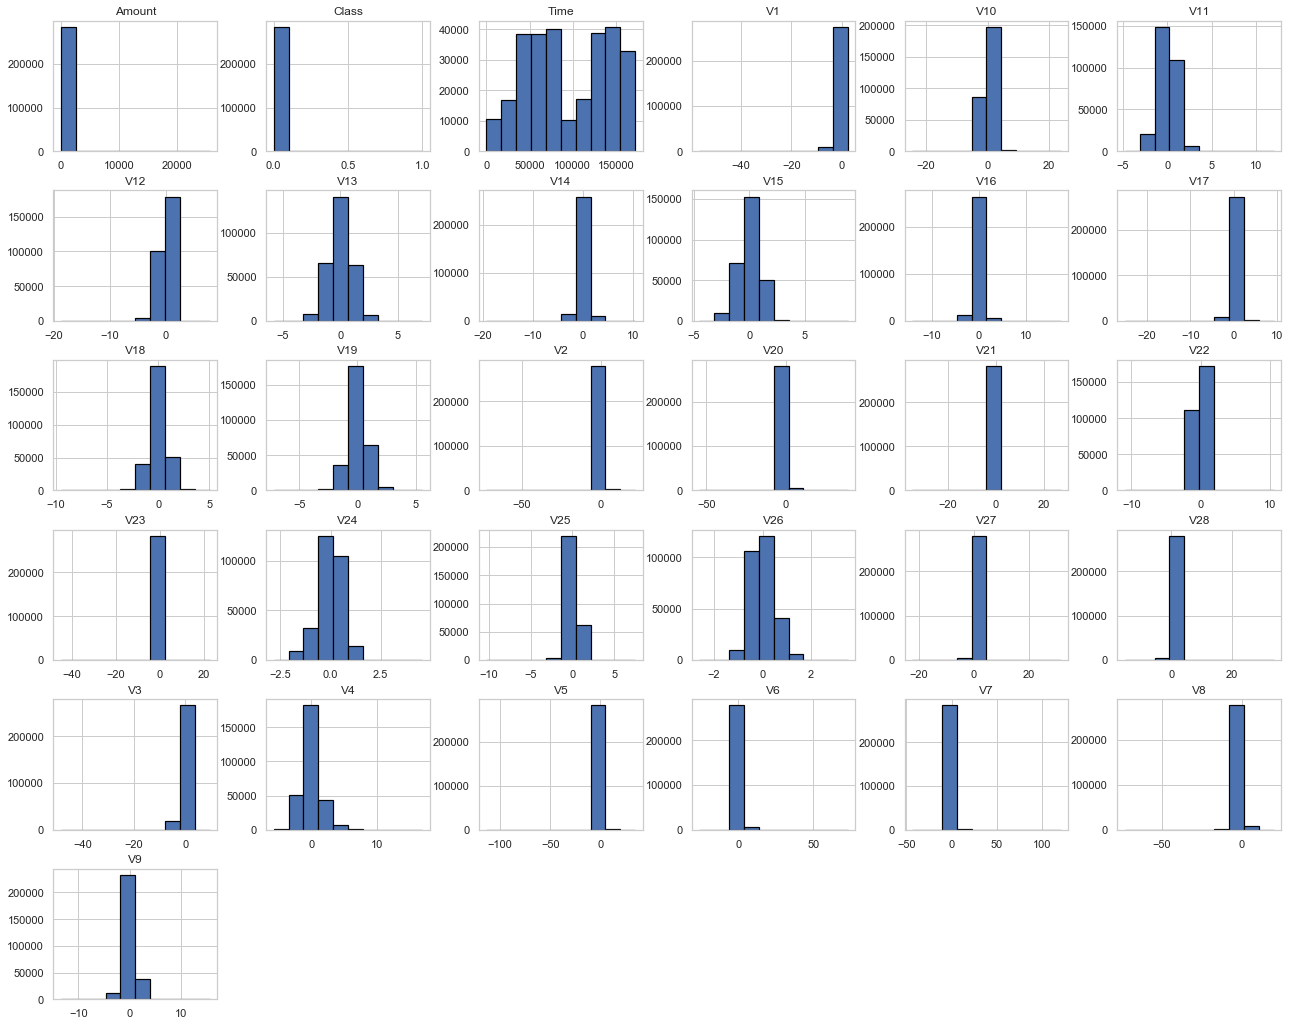

In [288]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(22,18)
plt.show()

In [285]:
# for i in data.columns:
#     print('-', i)

**Типы распределения**
- Из построеных гистограмм можно сделать вывод что в большинстве присутствует стьюдента распределение

**6. Построить матрицу корреляций для всех значений**

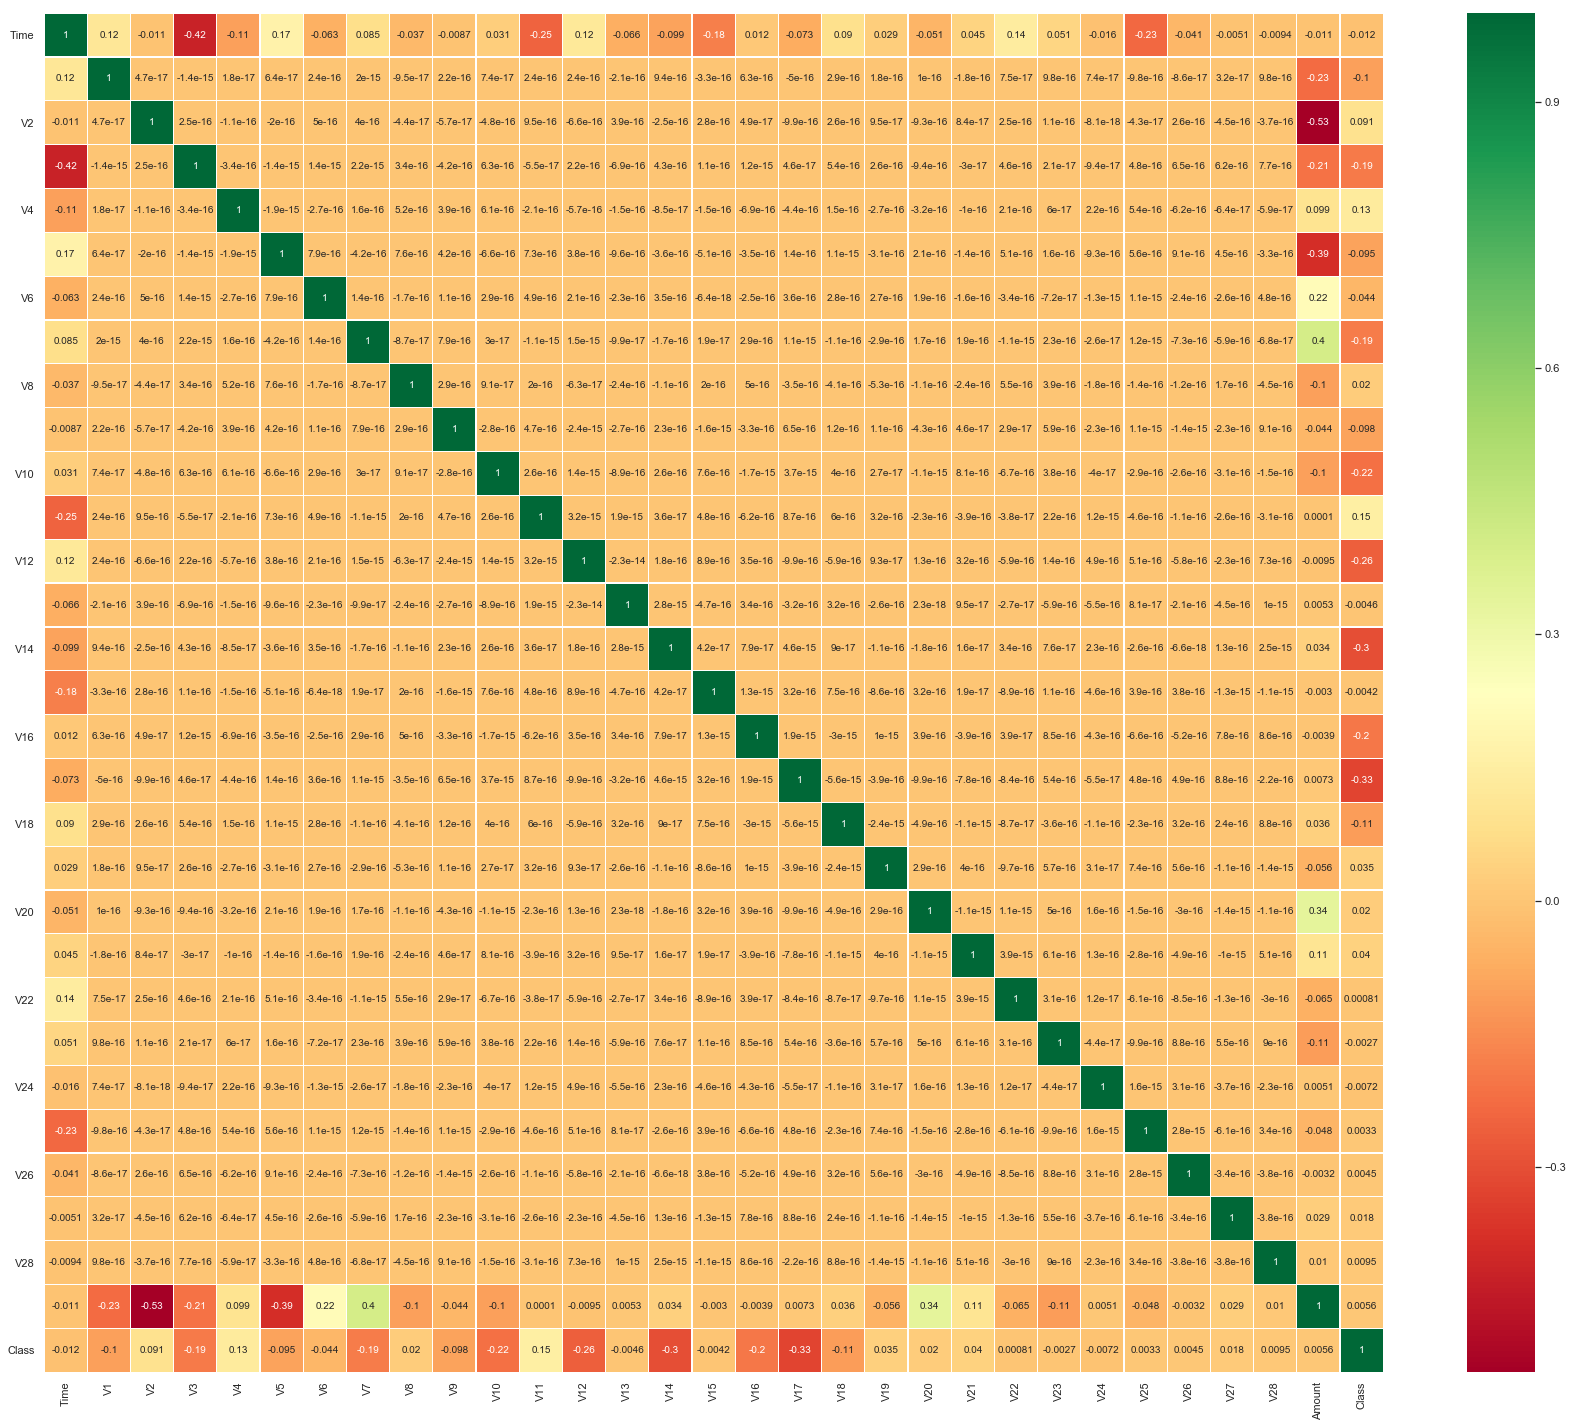

In [243]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(30,25)
plt.show()

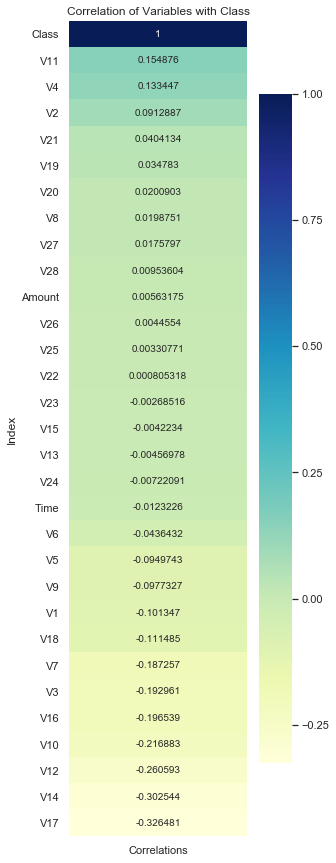

In [211]:
corr = data.corrwith(data['Class']).reset_index()
corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(4,15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='YlGnBu')
plt.title("Correlation of Variables with Class")
plt.show()

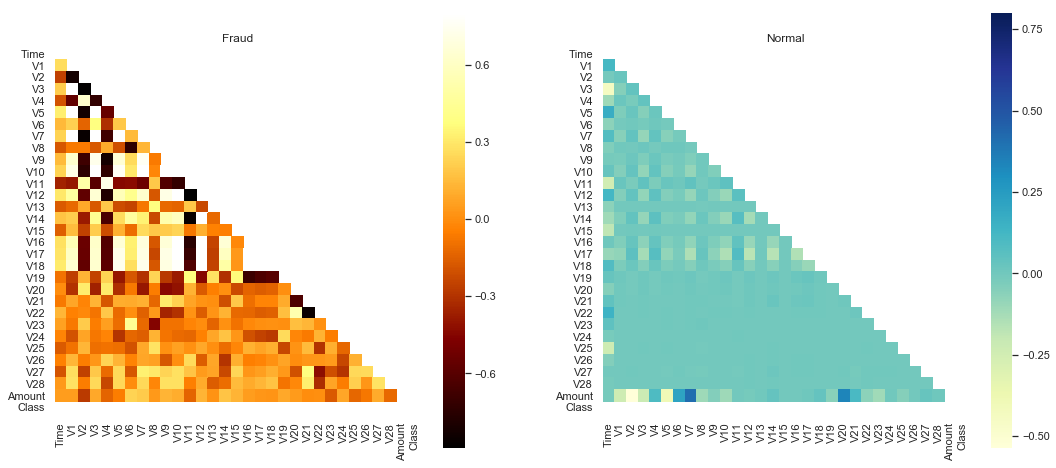

In [261]:
# Correlation matrix 
f, (ax1, ax2) = plt.subplots(1,2,figsize =( 18, 8))
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap((data.loc[data['Class'] ==1]).corr(), vmax = .8, square=True, ax = ax1, cmap = 'afmhot', mask=mask);
ax1.set_title('Fraud')
sns.heatmap((data.loc[data['Class'] ==0]).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu', mask=mask);
ax2.set_title('Normal')
plt.show()

In [161]:
correlation_matrix = data.corr(method ='pearson').round(2)
print(sorted(correlation_matrix['Class']))

[-0.33, -0.3, -0.26, -0.22, -0.2, -0.19, -0.19, -0.11, -0.1, -0.1, -0.09, -0.04, -0.01, -0.01, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.01, 0.01, 0.02, 0.02, 0.02, 0.03, 0.04, 0.09, 0.13, 0.15, 1.0]


Приведенная выше матрица корреляции показывает, что ни один из компонентов PCA V1-V28 не имеет какой-либо корреляции друг с другом, однако, если мы наблюдаем, что класс имеет некоторую форму положительных и отрицательных корреляций с компонентами V, но не имеет корреляции со временем и количеством.

**7. Выбрать несколько элементов исходя из матрицы корреляций для предсказания таргет значения Class. Построить модель линейной регрессии. Разделить датасет на 80% тренировочных данных и 20% тестовых данных. Для fit метода использовать тренировочные данные, проверить качество модели на тестовых данных. Почему модель дает такой результат?**

Для разделения на тренировочный датасет и тестовый датасет можно использовать функцию  из sklearn:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [212]:
column_sels = ['V11', 'V4', 'V2', 'V21']
x = data.loc[:,column_sels]
lstat = x['V11']
indus = x['V4']
nox = x['V2']
rm = x['V21']

y = data['Class']
x = np.vstack([np.array(lstat), np.array(indus), np.array(nox), np.array(rm)]).T
print('x - это многомерная матрица,: ')
print(x[:3])
model = LinearRegression().fit(x, y)

print('\nintercept:', model.intercept_)
print('slope:', model.coef_)

print('\nПредсказание модели: ', model.predict(x[0:2]))

x - это многомерная матрица,: 
[[-0.55159953  1.37815522 -0.07278117 -0.01830678]
 [ 1.61272666  0.44815408  0.26615071 -0.22577525]
 [ 0.62450146  0.37977959 -1.34016307  0.24799815]]

intercept: 0.001727485630620014
slope: [0.00630104 0.00391399 0.00229573 0.00228482]

Предсказание модели:  [0.00343701 0.01373856]


По всей видимости из-за того что данные абсолютно несбалансированы, модель всегда будет показывать ответ приближенный к 0 т.е. прогноз будет как "нормальная операция"

In [251]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(data.ix[:, data.columns != 'Class'])
y = pd.DataFrame(data.ix[:, data.columns == 'Class'])

# X = np.array(data.ix[:, data.columns != 'Class'])
# y = np.array(data.ix[:, data.columns == 'Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (227845, 30)
Number transactions y_train dataset:  (227845, 1)
Number transactions X_test dataset:  (56962, 30)
Number transactions y_test dataset:  (56962, 1)


In [264]:
column_sels = ['V11', 'V4', 'V2', 'V21']
x = X_train.loc[:,column_sels]
lstat = x['V11']
indus = x['V4']
nox = x['V2']
rm = x['V21']

y = y_train['Class']
x = np.vstack([np.array(lstat), np.array(indus), np.array(nox), np.array(rm)]).T
print('x - это многомерная матрица,: ')
print(x[:3])
model = LinearRegression().fit(x, y)

print('\nintercept:', model.intercept_)
print('slope:', model.coef_)

print('\nПредсказание модели: ', model.predict(x[0:2]))

x - это многомерная матрица,: 
[[-1.30559201 -1.06039825  1.03558276  3.02038533]
 [ 0.90015777 -0.16638065 -0.13882648 -0.17214738]
 [-1.39598297  1.59685187 -0.19862796 -0.52843197]]

intercept: 0.0017175832244189935
slope: [0.00612221 0.00383855 0.00234021 0.00257643]

Предсказание модели:  [-0.00014065  0.00582147]


**Предсказание до формирование X_train**

- intercept: 0.001727485630620014
- slope: [0.00630104 0.00391399 0.00229573 0.00228482]
- Предсказание модели:  [0.00343701 0.01373856]


**Предсказание после формирования X_train**

- intercept: 0.0017175832244189935
- slope: [0.00612221 0.00383855 0.00234021 0.00257643]
- Предсказание модели:  [-0.00014065  0.00582147]


**Вывод**

- Из-за неравномерного распределения данных регрессионная модель дает всегда 'Class' = 0

**8. Чтобы уравновесить датасет по классу Class, выберем одинаковое количество элементов из датасета по классу.** Необходимо посчитать минимальное количество (N) элементов, посчитанное в задаче 3. Выбрать N элементов рандомно из класса, имеющего бОльшее количество элементов, и все элементы из класса имеющего меньшее количество. Таким образом, мы уравновесим датасет по количеству элементов. Смоделировать линейную регрессию на полученном датасете. Посчитать качество модели. Получилось ли улучшить модель? Если да, то засчет чего?

In [60]:
df_class_0 = data.loc[data['Class'] ==0]
df_class_1 = data.loc[data['Class'] ==1]
print('Итого в df с классом 0 - {0}, с классом 1 - {1}'.format(len(df_class_0), len(df_class_1)))

data_class_0 = df_class_0.sample(n=492, replace=True)
data_class_1 = df_class_1.sample(n=492, replace=True)
print('\nИтого в df с классом 0 - {0}, с классом 1 - {1} после sample'.format(len(data_class_0), len(data_class_1)))

# df_new = [data_class_0, data_class_1]
# print('Посмотрим на тип после обьединения 2 'type(df_new))

df1 = pd.DataFrame(data_class_0)
df2 = pd.DataFrame(data_class_1)

merged_df = pd.concat([df1, df2])
print('\nТип df после обьединения двух выборок {}'.format(type(merged_df)))

Normal_n = merged_df[merged_df['Class']==0]
Fraud_n = merged_df[merged_df['Class']==1]

print("\nКолличество строк/столбцов по новому df с типом 'Нормальзых операций' {}".format(Normal_n.shape))
print("Колличество строк/столбцов по новому df с типом 'Обманных операций' {}".format(Fraud_n.shape))

Итого в df с классом 0 - 284315, с классом 1 - 492

Итого в df с классом 0 - 492, с классом 1 - 492 после sample

Тип df после обьединения двух выборок <class 'pandas.core.frame.DataFrame'>

Колличество строк/столбцов по новому df с типом 'Нормальзых операций' (492, 31)
Колличество строк/столбцов по новому df с типом 'Обманных операций' (492, 31)


In [59]:
display(merged_df.head())
display(merged_df.describe())
display(merged_df.shape)
display(merged_df.info())
display(merged_df.columns)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
63984,50966.0,-1.147158,1.206466,1.825329,1.499846,-0.022519,-0.794294,0.388108,0.402445,-1.380807,...,0.012263,-0.344612,0.149696,0.660069,-0.488495,-0.521261,-0.009078,0.052081,22.75,0
262759,160634.0,2.129101,-0.873931,-1.635981,-1.176035,-0.073736,-0.412121,-0.289237,-0.223462,-0.776604,...,-0.034599,-0.262403,0.091163,-1.095939,-0.098260,-0.387646,-0.046397,-0.065703,73.04,0
277546,167707.0,2.085175,0.393051,-4.508201,-0.311771,3.510117,2.453299,0.220469,0.543377,-0.100434,...,-0.067217,-0.072642,-0.036584,0.529693,0.414685,0.735870,-0.058233,-0.026658,0.76,0
89751,62710.0,-1.731600,2.269240,0.228666,0.164843,-0.820738,0.041376,-1.865793,-4.828316,-1.047303,...,-2.740131,0.087929,0.494253,0.288475,-0.280751,0.042352,0.065058,0.098445,29.99,0
11320,19703.0,1.231920,0.844809,0.251430,2.689905,0.257747,-0.796567,0.454675,-0.346564,0.272887,...,-0.168988,-0.273863,-0.089875,0.322729,0.698091,0.030810,-0.068421,0.003148,3.42,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,85419.785569,-2.071416,1.827607,-3.352604,2.247152,-1.449230,-0.810719,-2.534483,0.391359,-1.142954,...,0.481830,-0.061330,-0.013807,-0.044674,0.029426,0.049645,0.127731,0.052220,93.405874,0.500000
std,47405.324633,5.101548,3.340103,5.821537,3.030658,3.948034,1.585472,5.163720,4.368150,2.170325,...,2.489528,1.063383,0.925664,0.550256,0.668333,0.479289,0.876135,0.399557,220.672917,0.500254
min,112.000000,-29.876366,-11.052809,-30.558697,-3.979080,-21.665654,-5.773192,-43.557242,-41.044261,-13.320155,...,-22.797604,-8.887017,-15.981649,-2.028024,-3.536716,-1.223192,-7.263482,-1.869290,0.000000,0.000000
25%,43989.000000,-2.661802,-0.046193,-4.923940,-0.002383,-1.736251,-1.647575,-3.103570,-0.262746,-2.270235,...,-0.182044,-0.598418,-0.197425,-0.371214,-0.311290,-0.266845,-0.063907,-0.057208,1.000000,0.000000
50%,78741.500000,-0.697270,1.000125,-1.404221,1.321472,-0.391383,-0.763650,-0.589133,0.114645,-0.602495,...,0.138650,-0.043098,-0.028242,0.006715,0.061221,-0.002120,0.040795,0.034618,13.090000,0.500000
75%,129318.750000,1.126847,2.935226,0.253636,4.202830,0.502294,-0.017667,0.317385,0.855025,0.226680,...,0.728018,0.521369,0.190188,0.376640,0.412618,0.360384,0.431252,0.220267,94.865000,1.000000
max,172488.000000,2.341913,22.057729,3.430054,11.927512,11.095089,6.474115,4.031513,19.587773,4.830512,...,27.202839,8.316275,5.466230,1.160231,2.156042,2.745261,2.352333,1.779364,3460.560000,1.000000


(984, 31)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 63984 to 223366
Data columns (total 31 columns):
Time      984 non-null float64
V1        984 non-null float64
V2        984 non-null float64
V3        984 non-null float64
V4        984 non-null float64
V5        984 non-null float64
V6        984 non-null float64
V7        984 non-null float64
V8        984 non-null float64
V9        984 non-null float64
V10       984 non-null float64
V11       984 non-null float64
V12       984 non-null float64
V13       984 non-null float64
V14       984 non-null float64
V15       984 non-null float64
V16       984 non-null float64
V17       984 non-null float64
V18       984 non-null float64
V19       984 non-null float64
V20       984 non-null float64
V21       984 non-null float64
V22       984 non-null float64
V23       984 non-null float64
V24       984 non-null float64
V25       984 non-null float64
V26       984 non-null float64
V27       984 non-null float64
V28       984 non-nu

None

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

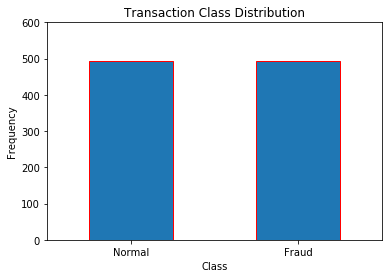

In [64]:
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(merged_df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0, edgecolor='red')
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.ylim((0, 600))
plt.show()

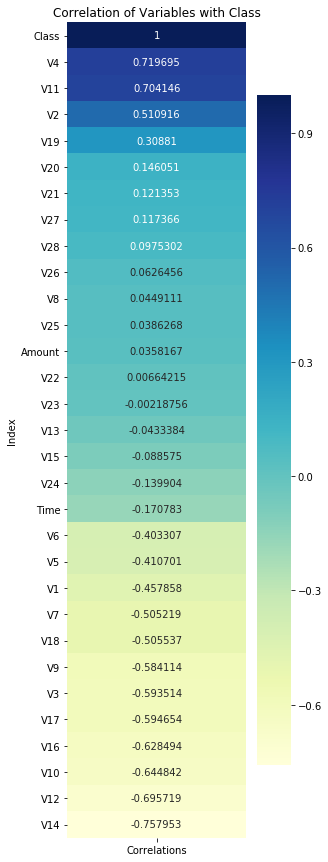

In [69]:
corr = merged_df.corrwith(merged_df['Class']).reset_index()
corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(4,15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='YlGnBu')
plt.title("Correlation of Variables with Class")
plt.show()

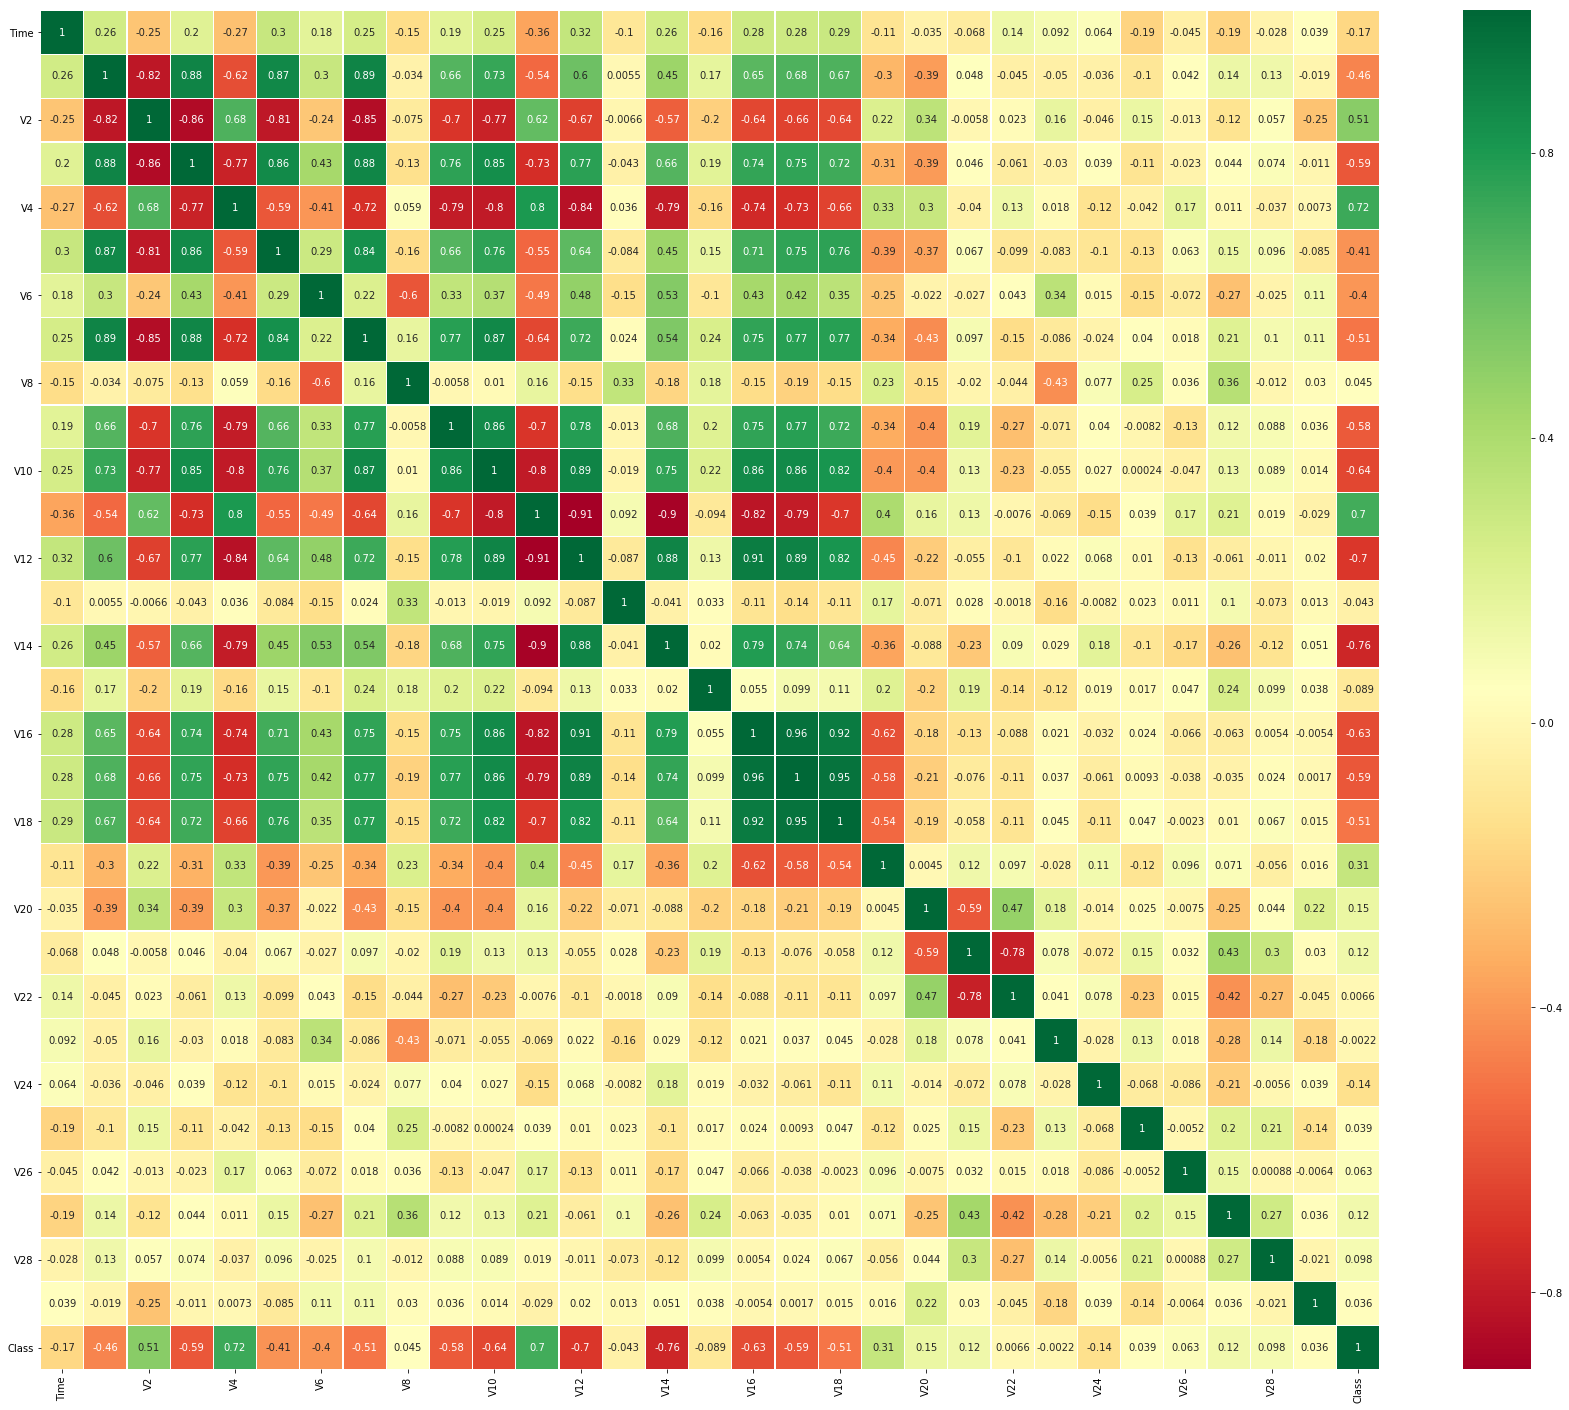

In [70]:
sns.heatmap(merged_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(30,25)
plt.show()

**Вывод** 
- матрица корреляции определенно изменилась в лучшую сторону, появилось больше нигативно и позитивно коррелирующих элементов

Далее возмем позитивно и неативно коррелирующие значения по графику corrwith и построим модель линейной регрессии

In [106]:
column_sels = ['V11', 'V4', 'V2', 'V19', 'V12', 'V10', 'V16', 'V3']
x = merged_df.loc[:,column_sels]
c1 = x['V11']
c2 = x['V4']
c3 = x['V2']
c4 = x['V19']
c5 = x['V12']
c6 = x['V10']
c7 = x['V16']
c8 = x['V3']

y = merged_df['Class']
x = np.vstack([np.array(c1), np.array(c2), np.array(c3), np.array(c4), np.array(c5), np.array(c6), np.array(c7), np.array(c8)]).T

print('x - это многомерная матрица,: ')
print(x[:3])

model = LinearRegression().fit(x, y)

print('\nintercept:', model.intercept_)
print('slope:', model.coef_)

print('\nПредсказание модели: \n', model.predict(x[0:1000:100]))

x - это многомерная матрица,: 
[[-1.33576539  0.25294472 -0.05923802  0.40559565  0.28364798  0.0701884
   0.08991536 -1.35145625]
 [ 2.79274706 -0.94079246 -0.66622432 -0.60247029 -2.26365484  0.21183167
   0.34524506  0.30153078]
 [ 0.79136683  1.18616099 -0.40902535 -0.46276479  1.14061913  0.27772822
   0.71883594  0.02854605]]

intercept: 0.2189901162527238
slope: [ 0.05488714  0.06306298 -0.0032222   0.0102426  -0.00269532 -0.00657556
  0.00250612  0.00042647]

Предсказание модели: 
 [0.16439339 0.38251648 0.2006388  0.12241334 0.22688292 0.81131192
 0.24739673 0.91172793 1.42186451 0.4508518 ]


In [105]:
merged_df[0:1000:100]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
278458,168236.0,2.110718,-0.059238,-1.351456,0.252945,0.204950,-0.815122,0.179522,-0.298611,0.568064,...,-0.333011,-0.815197,0.252978,-0.650963,-0.201576,0.238309,-0.070775,-0.066618,1.98,0
9158,13064.0,1.194561,-0.002368,0.992157,0.241336,-0.853426,-0.672348,-0.487593,-0.051571,1.444887,...,-0.279147,-0.638596,0.177922,0.510800,-0.083983,0.719937,-0.096083,0.000868,11.99,0
214324,139625.0,2.040578,-0.146368,-2.955721,-0.578510,2.609546,3.142573,-0.417135,0.784442,0.359925,...,-0.352449,-0.996836,0.363652,0.604817,-0.264490,0.219691,-0.039174,-0.042820,1.79,0
272638,165192.0,-0.101116,0.906738,-1.784290,-1.608126,3.074929,3.199164,0.353715,0.930593,0.028532,...,-0.365647,-0.927232,0.124760,0.588800,-0.371831,0.168896,0.351970,0.130124,1.79,0
268217,163114.0,2.054221,0.179577,-1.656051,0.442161,0.408987,-0.924021,0.236140,-0.277526,0.399559,...,-0.346899,-0.882697,0.339313,0.654663,-0.255177,0.162580,-0.060192,-0.026921,8.99,0
151807,96291.0,-3.552173,5.426461,-3.731810,6.679062,-2.187543,2.433940,-8.748110,-12.108284,-2.856359,...,-5.688990,2.510980,0.953933,-0.542506,-0.620152,0.406013,0.023025,0.164741,33.59,1
96341,65728.0,1.227614,-0.668974,-0.271785,-0.589440,-0.604795,-0.350285,-0.486365,-0.010809,-0.794944,...,-0.026055,-0.295255,-0.180459,-0.436539,0.494649,-0.283738,-0.001128,0.035075,98.01,1
15566,26961.0,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,-3.845567,...,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,99.99,1
10690,18088.0,-12.224021,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,...,-1.159830,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,1218.89,1
261473,160034.0,-2.349340,1.512604,-2.647497,1.753792,0.406328,-2.188494,-0.686935,-0.547984,-0.099528,...,-0.088519,-0.595178,0.258148,0.061901,-0.354180,-1.152671,-0.736073,0.733703,4.90,1


**Вывод**
- Как можно увидеть предсказине первых пяти элементов [0.16439339, 0.38251648, 0.2006388, 0.12241334, 0.22688292] выдает значение приблеженные к 0, что совпадает с нашей таблицей
- В другом случае значения от 6 до 10 элементов [0.81131192, 0.24739673, 0.91172793, 1.42186451, 0.4508518] показывает что идет приближение к 1 и даже есть значения которые при округлении до целого говорят что данная операция является мощейнической, что подтверждается выборкой из df

Модель получилось улучшить путем уравнивания значений в искомых выборках по двум типам операций, что привело к более точным прогнозам по построенной модели

In [116]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(merged_df.ix[:, merged_df.columns != 'Class'])
y = pd.DataFrame(merged_df.ix[:, merged_df.columns == 'Class'])

# X = np.array(data.ix[:, data.columns != 'Class'])
# y = np.array(data.ix[:, data.columns == 'Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (688, 30)
Number transactions y_train dataset:  (688, 1)
Number transactions X_test dataset:  (296, 30)
Number transactions y_test dataset:  (296, 1)


In [117]:
column_sels = ['V11', 'V4', 'V2', 'V19', 'V12', 'V10', 'V16', 'V3']
x = X_train.loc[:,column_sels]
c1 = x['V11']
c2 = x['V4']
c3 = x['V2']
c4 = x['V19']
c5 = x['V12']
c6 = x['V10']
c7 = x['V16']
c8 = x['V3']

y = y_train['Class']
x = np.vstack([np.array(c1), np.array(c2), np.array(c3), np.array(c4), np.array(c5), np.array(c6), np.array(c7), np.array(c8)]).T

print('x - это многомерная матрица,: ')
print(x[:3])

model = LinearRegression().fit(x, y)

print('\nintercept:', model.intercept_)
print('slope:', model.coef_)

print('\nПредсказание модели: \n', model.predict(x[0:1000:100]))

x - это многомерная матрица,: 
[[ -0.03842177  -1.23094301  -0.76269687   1.50775929  -0.20659549
    1.00345377   0.74164913  -2.58713278]
 [ 10.06378975  11.90616991   7.87515679   0.71978768 -14.3947668
  -13.26165171  -8.16163245 -21.87231736]
 [ -1.7022284    2.80535094   1.37376948  -1.49715223  -0.24005633
    0.95500447   0.3723793   -0.48892601]]

intercept: 0.2157675946023937
slope: [ 0.06341793  0.06306857  0.0027924   0.01321494  0.00161251 -0.00763357
  0.00436709  0.00365084]

Предсказание модели: 
 [0.13929291 0.0869586  0.5194499  0.64208328 0.29165155 0.33703963
 0.1433995 ]


In [118]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.081, test: 0.095
R^2 train: 0.678, test: 0.621


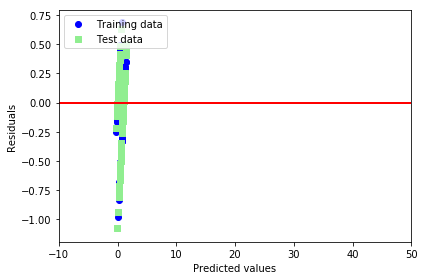

In [115]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

**9. Построить boxplot графики для 4ех негативно коррелирующих элементов и 4 позитивно коррелирующих элементов для полученного в шаге 8 датасете.** Пример boxplot:

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])

In [120]:
merged_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
278458,168236.0,2.110718,-0.059238,-1.351456,0.252945,0.204950,-0.815122,0.179522,-0.298611,0.568064,...,-0.333011,-0.815197,0.252978,-0.650963,-0.201576,0.238309,-0.070775,-0.066618,1.98,0
4452,3770.0,1.190227,-0.666224,0.301531,-0.940792,0.132278,1.762026,-1.073732,0.515898,0.291707,...,-0.108953,-0.120231,0.161079,-1.781591,-0.056778,-0.368204,0.045687,-0.012324,28.70,0
221579,142616.0,1.809342,-0.409025,0.028546,1.186161,-0.540659,0.514600,-0.845898,0.300301,0.874151,...,0.131223,0.401697,0.275419,0.665505,-0.377583,-0.809734,0.066713,-0.016216,45.00,0
156627,108539.0,-1.911769,-0.256423,0.606163,0.275736,3.280235,-1.796136,0.633627,-0.222043,0.176329,...,0.111260,-0.039675,-0.277850,0.600328,1.410152,-0.511374,-0.116703,0.066621,13.98,0
211099,138266.0,2.038479,-0.280081,-1.226919,0.248647,-0.137846,-0.760991,-0.081098,-0.036034,0.654473,...,-0.284677,-0.835708,0.315288,-0.399381,-0.364568,0.205962,-0.090286,-0.078176,2.69,0


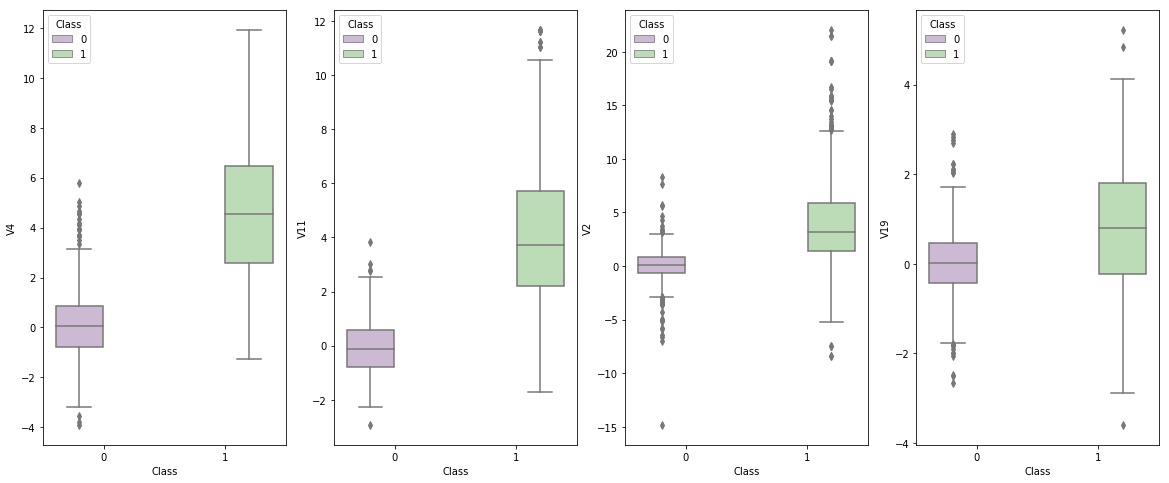

In [158]:
# позитивная корреляция

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,8))
s = sns.boxplot(ax = ax1, x="Class", y="V4", hue="Class",data=merged_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="V11", hue="Class",data=merged_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax3, x="Class", y="V2", hue="Class",data=merged_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax4, x="Class", y="V19", hue="Class",data=merged_df, palette="PRGn",showfliers=True)
plt.show()

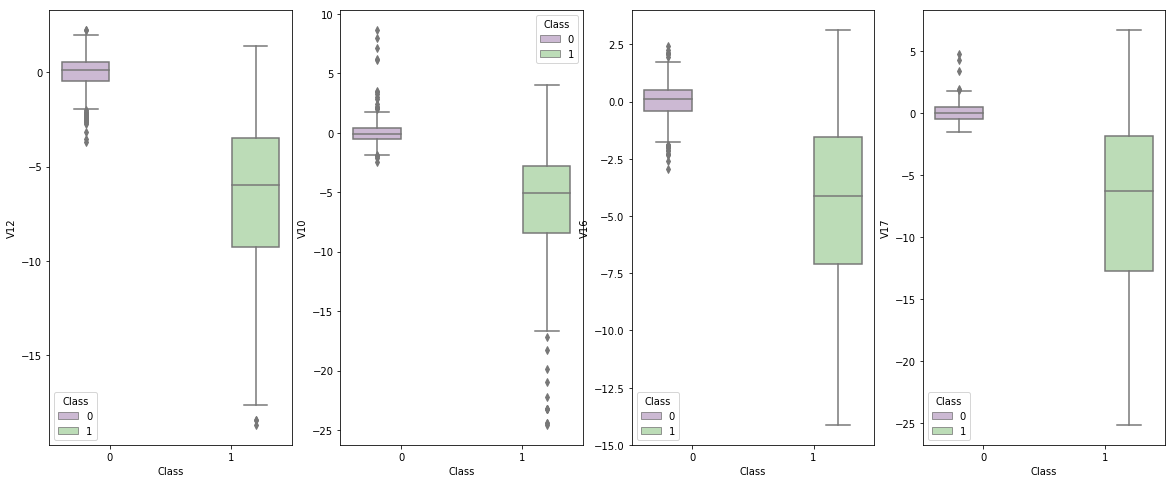

In [159]:
# Негативная корреляция 

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20,8))
s = sns.boxplot(ax = ax5, x="Class", y="V12", hue="Class",data=merged_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax6, x="Class", y="V10", hue="Class",data=merged_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax7, x="Class", y="V16", hue="Class",data=merged_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax8, x="Class", y="V17", hue="Class",data=merged_df, palette="PRGn",showfliers=True)
plt.show()

**10. Из графиков, полученных на предыдущем шаге, убрать выбросы методом выборки элементов из интерквартильного интервала (взять только те элементы, которые находятся квартилем 0.25 и квартилем 0.75).** Посчитать качество модели и сравнить с предыдущим. Получилось ли улучшить модель? Почему?

In [160]:
for k, v in merged_df.items():
    # считаем точки в квантиле 25% от медианы
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        # выбросы находятся за этими точками
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(merged_df)[0]
        print("Выбросы колонки %s = %.2f%%" % (k, perc))

Выбросы колонки Time = 0.00%
Выбросы колонки V1 = 9.76%
Выбросы колонки V2 = 7.62%
Выбросы колонки V3 = 7.62%
Выбросы колонки V4 = 0.91%
Выбросы колонки V5 = 12.09%
Выбросы колонки V6 = 9.04%
Выбросы колонки V7 = 12.20%
Выбросы колонки V8 = 18.60%
Выбросы колонки V9 = 3.25%
Выбросы колонки V10 = 7.52%
Выбросы колонки V11 = 2.03%
Выбросы колонки V12 = 3.25%
Выбросы колонки V13 = 0.30%
Выбросы колонки V14 = 0.81%
Выбросы колонки V15 = 1.73%
Выбросы колонки V16 = 4.78%
Выбросы колонки V17 = 6.30%
Выбросы колонки V18 = 8.13%
Выбросы колонки V19 = 3.25%
Выбросы колонки V20 = 12.40%
Выбросы колонки V21 = 10.26%
Выбросы колонки V22 = 2.34%
Выбросы колонки V23 = 11.99%
Выбросы колонки V24 = 1.12%
Выбросы колонки V25 = 5.89%
Выбросы колонки V26 = 0.91%
Выбросы колонки V27 = 18.09%
Выбросы колонки V28 = 13.01%
Выбросы колонки Amount = 11.08%
Выбросы колонки Class = 0.00%


In [165]:
headers = list(data.columns.values)

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(merged_df)
df_norm = pd.DataFrame(np_scaled)

df_norm.columns = headers
df_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.947374,0.986826,-0.198842,0.716736,-0.474448,0.316828,-0.131835,0.756011,0.362887,0.518416,...,-0.101424,-0.064083,0.578225,-0.245721,0.340504,-0.286298,0.394498,0.302596,-0.999153,-1.0
1,-0.959478,0.927486,-0.231744,0.815180,-0.625212,0.312269,0.268331,0.705694,0.390132,0.488447,...,-0.092462,0.016498,0.570790,-1.000000,0.382885,-0.597496,0.417077,0.327206,-0.987722,-1.0
2,0.650330,0.967397,-0.217802,0.798923,-0.356587,0.270053,0.074637,0.714841,0.382920,0.551609,...,-0.082855,0.077015,0.580041,0.632538,0.288990,-0.824041,0.421153,0.325442,-0.980749,-1.0
3,0.255235,0.727514,-0.209530,0.833323,-0.471569,0.509750,-0.284162,0.774243,0.365448,0.475935,...,-0.083654,0.025838,0.535279,0.589057,0.812233,-0.670955,0.385593,0.362989,-0.994019,-1.0
4,0.599896,0.982169,-0.210813,0.724153,-0.474991,0.295323,-0.123430,0.745547,0.371670,0.527786,...,-0.099491,-0.066461,0.583267,-0.077882,0.292799,-0.302896,0.390715,0.297357,-0.998849,-1.0


In [167]:
# создаем матрицу корреляций
corr_matrix = merged_df.corr().abs()

# Выбираем верхний треугольник матрицы
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Ищем индексы колонок с корреляцией большей чем 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
print(to_drop)

df_norm = merged_df.drop(merged_df[to_drop], axis=1)
df_norm.head()

['V12', 'V14', 'V16', 'V17', 'V18']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
278458,168236.0,2.110718,-0.059238,-1.351456,0.252945,0.204950,-0.815122,0.179522,-0.298611,0.568064,...,-0.333011,-0.815197,0.252978,-0.650963,-0.201576,0.238309,-0.070775,-0.066618,1.98,0
4452,3770.0,1.190227,-0.666224,0.301531,-0.940792,0.132278,1.762026,-1.073732,0.515898,0.291707,...,-0.108953,-0.120231,0.161079,-1.781591,-0.056778,-0.368204,0.045687,-0.012324,28.70,0
221579,142616.0,1.809342,-0.409025,0.028546,1.186161,-0.540659,0.514600,-0.845898,0.300301,0.874151,...,0.131223,0.401697,0.275419,0.665505,-0.377583,-0.809734,0.066713,-0.016216,45.00,0
156627,108539.0,-1.911769,-0.256423,0.606163,0.275736,3.280235,-1.796136,0.633627,-0.222043,0.176329,...,0.111260,-0.039675,-0.277850,0.600328,1.410152,-0.511374,-0.116703,0.066621,13.98,0
211099,138266.0,2.038479,-0.280081,-1.226919,0.248647,-0.137846,-0.760991,-0.081098,-0.036034,0.654473,...,-0.284677,-0.835708,0.315288,-0.399381,-0.364568,0.205962,-0.090286,-0.078176,2.69,0


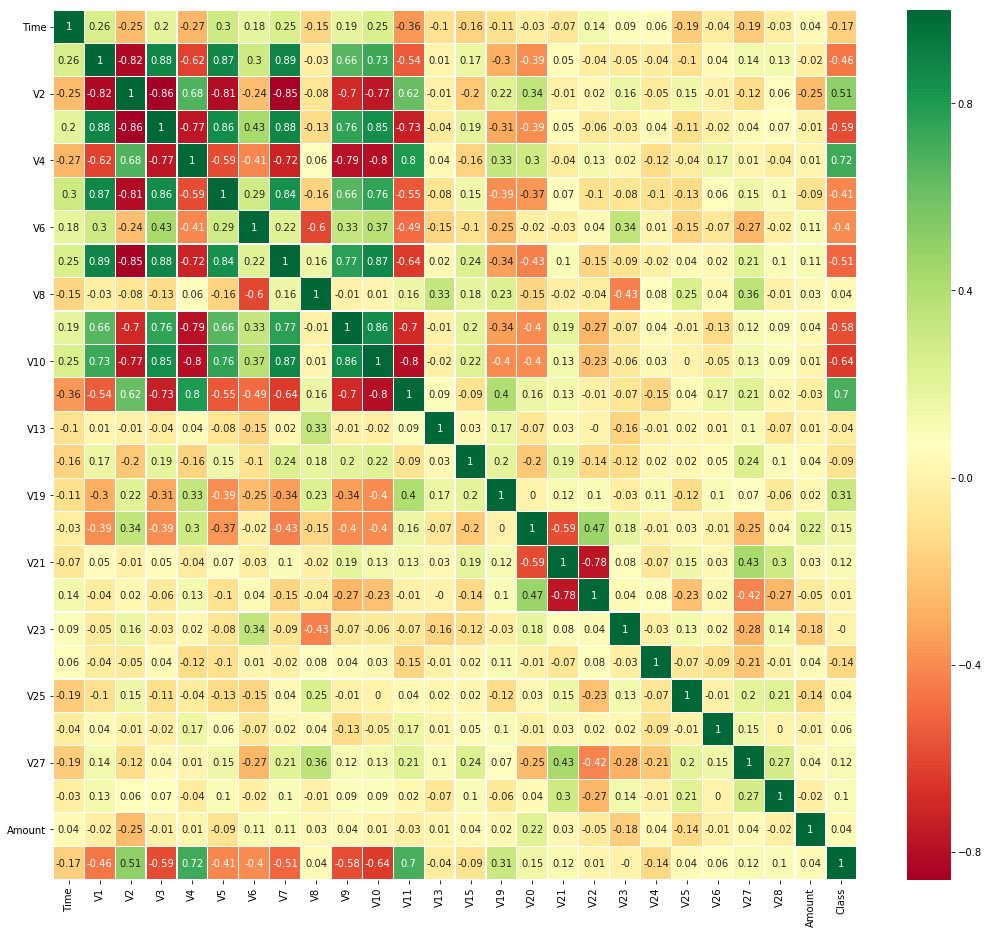

In [170]:
correlation_matrix = df_norm.corr(method ='pearson').round(2)
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(18,16)
plt.show()

In [181]:
correlation_matrix = df_norm.corr(method ='pearson').round(2)
print(sorted(correlation_matrix['Class']))

[-0.64, -0.59, -0.58, -0.51, -0.46, -0.41, -0.4, -0.17, -0.14, -0.09, -0.04, -0.0, 0.01, 0.04, 0.04, 0.04, 0.06, 0.1, 0.12, 0.12, 0.15, 0.31, 0.51, 0.7, 0.72, 1.0]


In [172]:
for k, v in df_norm.items():
    # считаем точки в квантиле 25% от медианы
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        # выбросы находятся за этими точками
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df_norm)[0]
        print("Выбросы колонки %s = %.2f%%" % (k, perc))

Выбросы колонки Time = 0.00%
Выбросы колонки V1 = 9.76%
Выбросы колонки V2 = 7.62%
Выбросы колонки V3 = 7.62%
Выбросы колонки V4 = 0.91%
Выбросы колонки V5 = 12.09%
Выбросы колонки V6 = 9.04%
Выбросы колонки V7 = 12.20%
Выбросы колонки V8 = 18.60%
Выбросы колонки V9 = 3.25%
Выбросы колонки V10 = 7.52%
Выбросы колонки V11 = 2.03%
Выбросы колонки V13 = 0.30%
Выбросы колонки V15 = 1.73%
Выбросы колонки V19 = 3.25%
Выбросы колонки V20 = 12.40%
Выбросы колонки V21 = 10.26%
Выбросы колонки V22 = 2.34%
Выбросы колонки V23 = 11.99%
Выбросы колонки V24 = 1.12%
Выбросы колонки V25 = 5.89%
Выбросы колонки V26 = 0.91%
Выбросы колонки V27 = 18.09%
Выбросы колонки V28 = 13.01%
Выбросы колонки Amount = 11.08%
Выбросы колонки Class = 0.00%


In [195]:
# df_norm.describe()
# print(df_norm.columns)

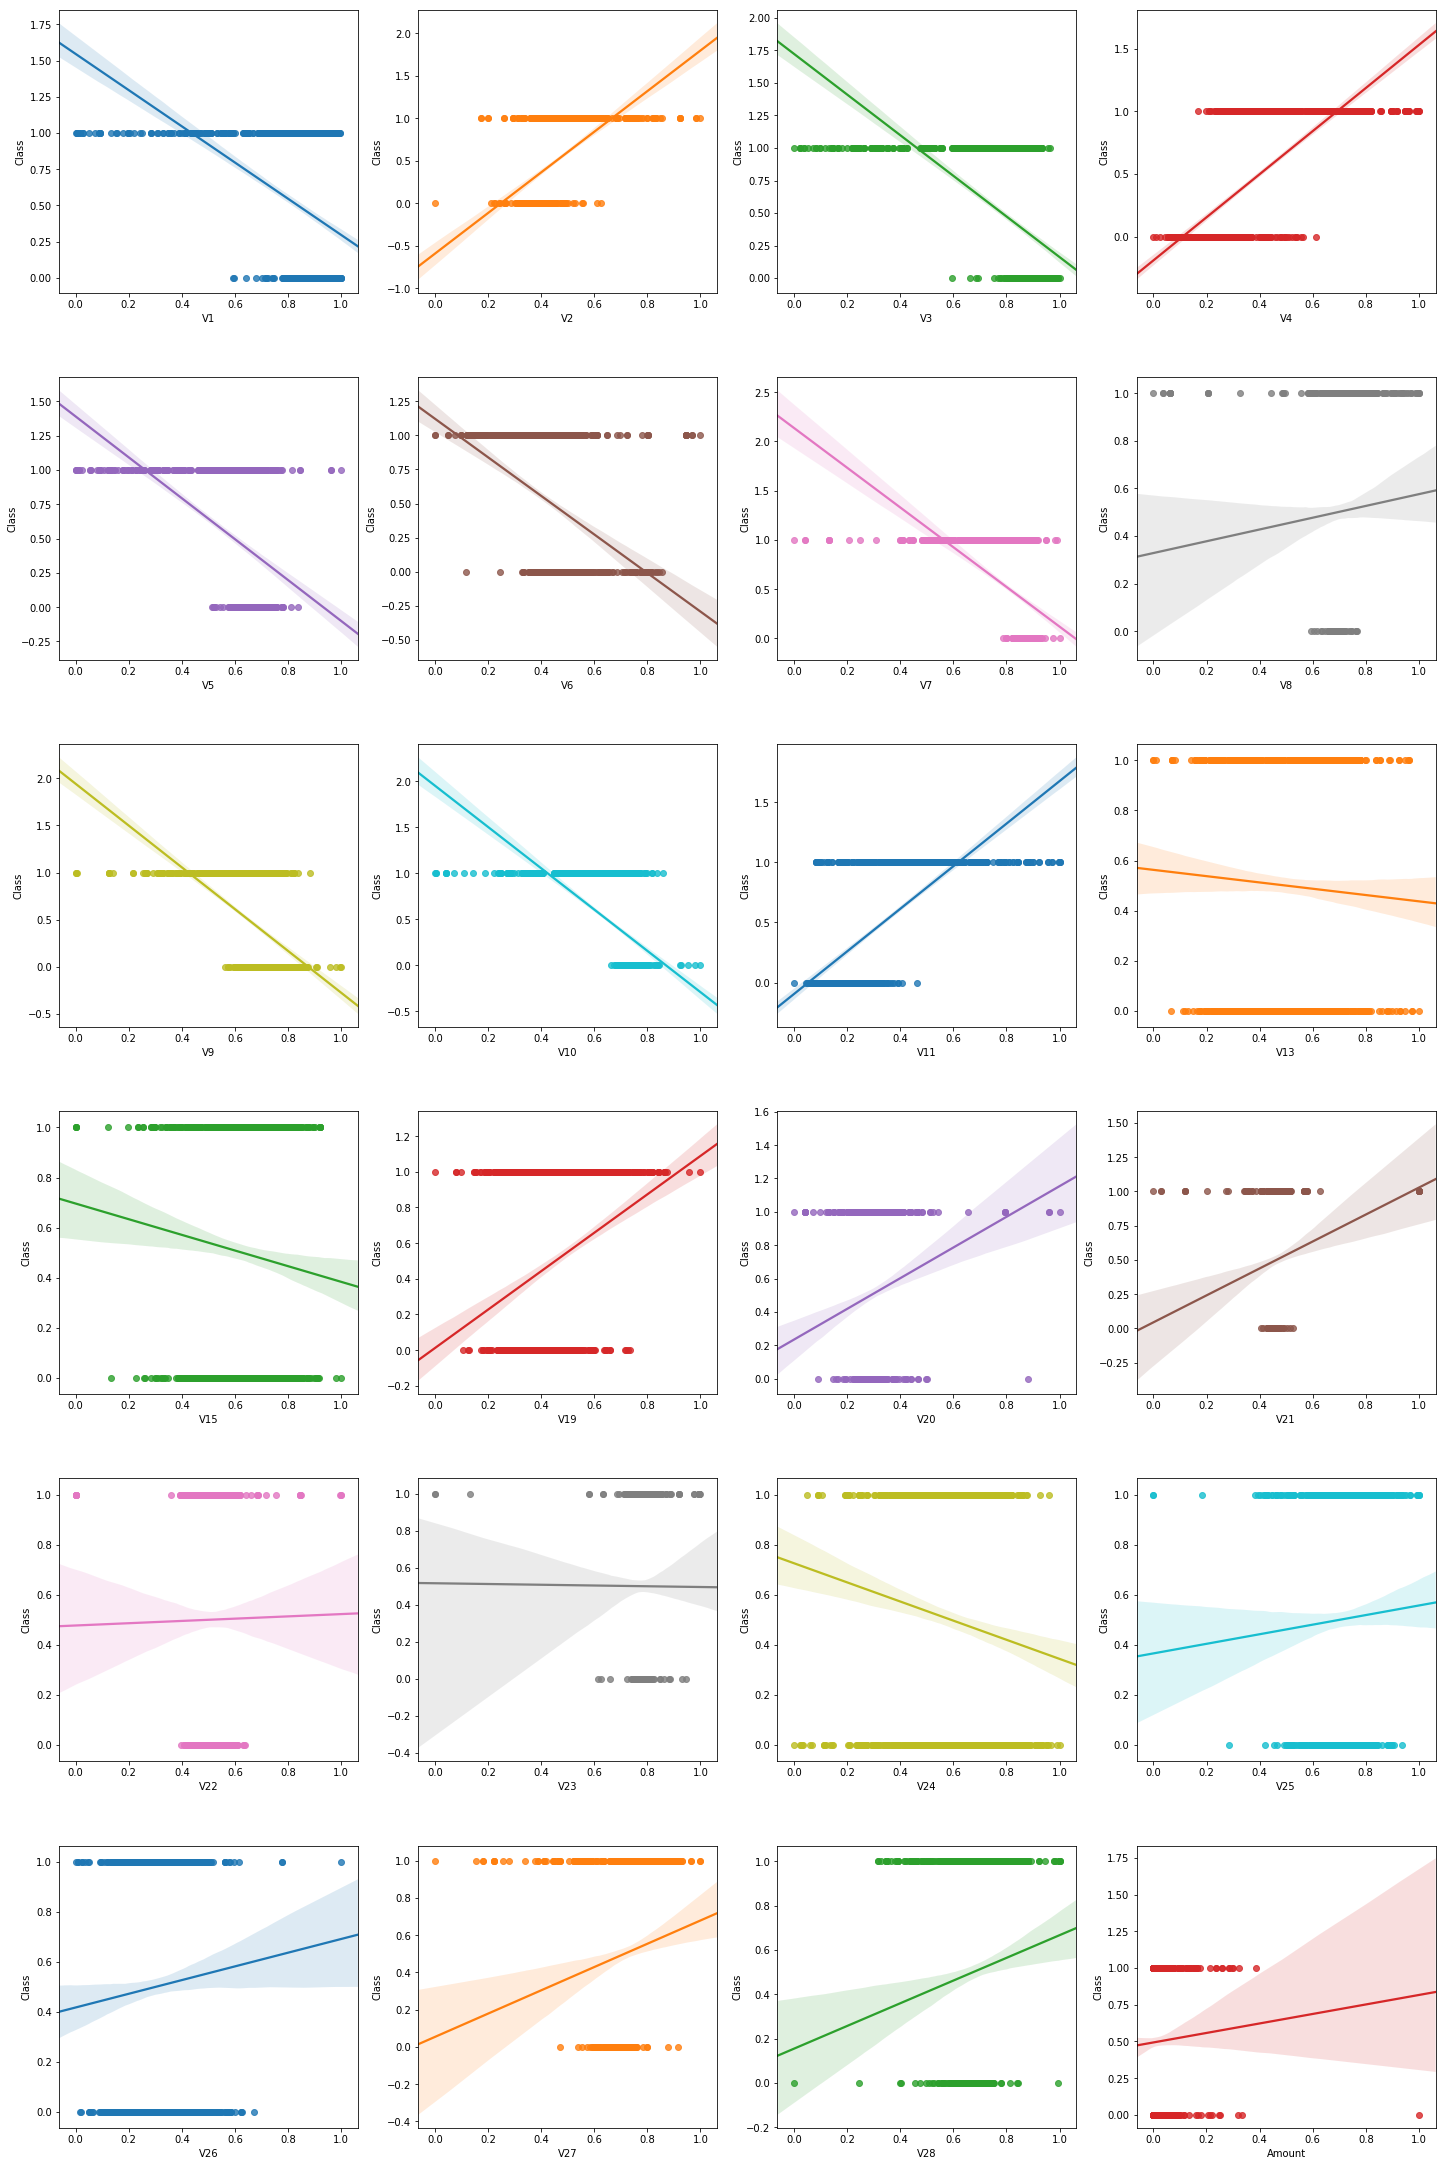

In [217]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 
               'V9', 'V10', 'V11', 'V13', 'V15', 'V19', 'V20', 
               'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 
               'V28', 'Amount']
x = df_norm.loc[:,column_sels]
y = df_norm['Class']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

fig, axs = plt.subplots(ncols=4, nrows=6, figsize=(20, 30))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Выбирем данные для новой модели

- v2
- v4
- v11
- v19

- v7
- v10
- v9
- v3

In [197]:
data_new = df_norm[['V2', 'V4', 'V11', 'V19', 'V7', 'V10', 'V9', 'V3', 'Class']]

In [199]:
data_new.head()

,V2,V4,V11,V19,V7,V10,V9,V3,Class
278458,-0.059238,0.252945,-1.335765,0.405596,0.179522,0.070188,0.568064,-1.351456,0
4452,-0.666224,-0.940792,2.792747,-0.602470,-1.073732,0.211832,0.291707,0.301531,0
221579,-0.409025,1.186161,0.791367,-0.462765,-0.845898,0.277728,0.874151,0.028546,0
156627,-0.256423,0.275736,-0.062056,-1.156174,0.633627,-1.034146,0.176329,0.606163,0
211099,-0.280081,0.248647,0.276579,0.571460,-0.081098,0.310262,0.654473,-1.226919,0


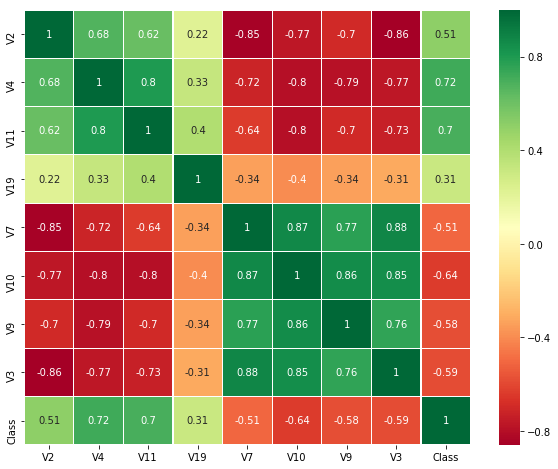

In [201]:
correlation_matrix = data_new.corr(method ='pearson').round(2)
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [203]:
corr_matrix = data_new.corr(method ='pearson').round(2)
print(sorted(corr_matrix['Class']))

[-0.64, -0.59, -0.58, -0.51, 0.31, 0.51, 0.7, 0.72, 1.0]


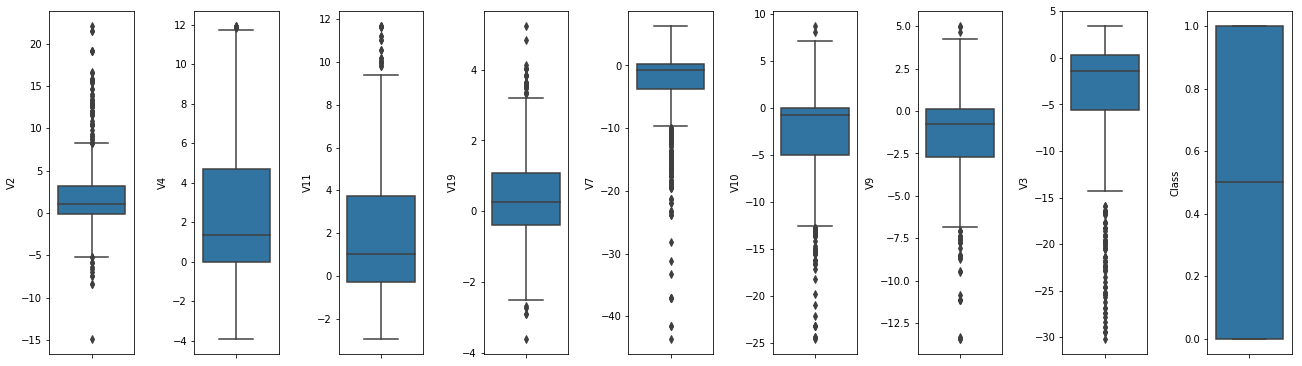

In [210]:
fig, axs = plt.subplots(ncols=9, nrows=1, figsize=(18, 5))
index = 0
axs = axs.flatten()
for k,v in data_new.items():
    sns.boxplot(y=k, data=data_new, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [211]:
for k, v in data_new.items():
    # считаем точки в квантиле 25% от медианы
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        # выбросы находятся за этими точками
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data_new)[0]
        print("Выбросы колонки %s = %.2f%%" % (k, perc))

Выбросы колонки V2 = 7.62%
Выбросы колонки V4 = 0.91%
Выбросы колонки V11 = 2.03%
Выбросы колонки V19 = 3.25%
Выбросы колонки V7 = 12.20%
Выбросы колонки V10 = 7.52%
Выбросы колонки V9 = 3.25%
Выбросы колонки V3 = 7.62%
Выбросы колонки Class = 0.00%


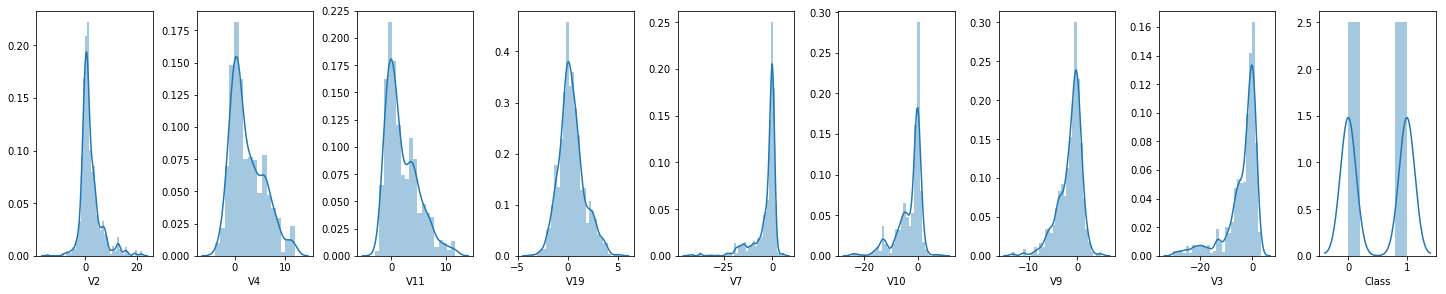

In [216]:
fig, axs = plt.subplots(ncols=9, nrows=1, figsize=(20, 4))
index = 0
axs = axs.flatten()
for k,v in data_new.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Тут сложная ситуация, если я начну срезать данные df еще сильнее уменьшится, по этому построю модель на тех данных что есть на новом df

In [219]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(data_new.ix[:, data_new.columns != 'Class'])
y = pd.DataFrame(data_new.ix[:, data_new.columns == 'Class'])

# X = np.array(data.ix[:, data.columns != 'Class'])
# y = np.array(data.ix[:, data.columns == 'Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (787, 8)
Number transactions y_train dataset:  (787, 1)
Number transactions X_test dataset:  (197, 8)
Number transactions y_test dataset:  (197, 1)


In [220]:
column_sels = ['V2', 'V4', 'V11', 'V19', 'V7', 'V10', 'V9', 'V3']
x = X_train.loc[:,column_sels]
c1 = x['V2']
c2 = x['V4']
c3 = x['V11']
c4 = x['V19']
c5 = x['V7']
c6 = x['V10']
c7 = x['V9']
c8 = x['V3']

y = y_train['Class']
x = np.vstack([np.array(c1), np.array(c2), 
               np.array(c3), np.array(c4), 
               np.array(c5), np.array(c6), 
               np.array(c7), np.array(c8)]).T

print('x - это многомерная матрица,: ')
print(x[:3])

model = LinearRegression().fit(x, y)

print('\nintercept:', model.intercept_)
print('slope:', model.coef_)

x - это многомерная матрица,: 
[[  7.09891625   8.60755679  11.61972348  -0.50175065  -8.13858942
  -13.19341507  -6.27279047 -11.4264671 ]
 [ -0.03069504   3.88512964  -0.22729326  -1.05143618  -0.38502982
    1.46912229  -0.28091536  -0.37240442]
 [  0.22305749   0.30387764  -0.67923927   0.12553151   0.2422224
   -0.42063033   0.34253899  -1.85000767]]

intercept: 0.19953147230873186
slope: [ 0.01409157  0.06614968  0.04614313  0.01579097  0.02639397 -0.02894704
  0.01491833 -0.00642822]


In [224]:
data_new[0:2]

,V2,V4,V11,V19,V7,V10,V9,V3,Class
278458,-0.059238,0.252945,-1.335765,0.405596,0.179522,0.070188,0.568064,-1.351456,0
4452,-0.666224,-0.940792,2.792747,-0.602470,-1.073732,0.211832,0.291707,0.301531,0


In [228]:
print('\nПредсказание модели: \n', model.predict(x[0:5]))


Предсказание модели: 
 [1.54417374 0.37452171 0.22898773 0.30340934 1.03497408]


In [229]:
y_train[0:5]

,Class
8615,1
255209,0
219947,0
3496,0
150925,1


In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

# model = LogisticRegression()
# model.fit(X_train, y_train)

In [233]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.101, test: 0.123
R^2 train: 0.596, test: 0.505


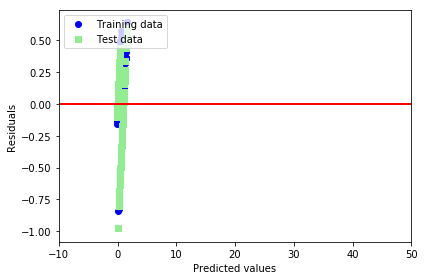

In [234]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

In [239]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ['V2', 'V4', 'V11', 'V19', 'V7', 'V10', 'V9', 'V3', 'Class']

results = smf.ols('Class ~ V2', data=data_new).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     346.9
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           1.55e-66
Time:                        17:16:06   Log-Likelihood:                -565.35
No. Observations:                 984   AIC:                             1135.
Df Residuals:                     982   BIC:                             1144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3696      0.015     24.005      0.000       0.339       0.400
V2             0.0647      0.003     18.625      0.000       0.058       0.072
==============================================================================
Omnibus:                     5421.437   Durbin-Watson:                   0.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.460
Skew:                           0.347   Prob(JB):                     5.07e-21
Kurtosis:                       1.659   Cond. No.                         5.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Из поправок:

- In [264]: непонятно, почему были взяты только данные вектора: column_sels = [‘V11’, ‘V4’, ‘V2’, ‘V21’]. Желательно, чтобы в этом выборе были разные переменный, например, одна переменная должна положительно коррелировать с таргет значением, а вторая переменная - отрицательно. У тебя получается, что для таргет значения Fraud корреляция данных векторов примерно похожая, то есть лучше другие значения поискать. В цифрах: корреляция с таргет значением данных векторов - [0.15, 0.13, -0.1, 0.04]. Нет ни одного отрицательно коррелирующего значения. Что не очень хорошо для модели.
- в ответе на 7 вопрос, при построении модели регрессии, мы делим данные на тренировочные и на тестовые. Качество модели должно считаться на всем датасете тестовом. То есть делаем predict для всех тестовых данных и считаем ошибку модели как асбсолютную разность между предсказанным и истинным значением, или квадратичную разность. У тебя получается, что предсказание идет только по 2ум переменным, которые есть в тренировочном датасете. Вывод тоже делается на основе этих предсказаний. Нужно делать вывод на основе предсказаний всех тестовых данных. “Из-за неравномерного распределения данных регрессионная модель дает всегда ‘Class’ = 0”
- не совсем поняла данный код print(’\nПредсказание модели: \n’, model.predict(x[0:1000:100])) почему x[0:1000:100]?
- In [119]: нельзя считать ошибки модели на тренировочных данных. Мы же на них обучались. Считать ошибку надо на тестовых данных.
- In [160]: v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)] а зачем добавил вычитание 1.5 * irq? и сложение? ты же меняешь интервал.
- In [233]: ошибки считаем на тестовых данных
- “Вывод путем среза большого колличества данных ухудшилась сама модель,” - мне кажется, по коду, у тебя не интерквартильный интервал получился, а наоборот, большее значение интервала получилось, чем нужно

In [226]:
pass